Model Performance
-----------------
R2 Score: 0.8784410263661487
MAE: 6.5947057253086445

--- Enter Hospital Data for Prediction ---

Predicted Bed Occupancy: 97.46%


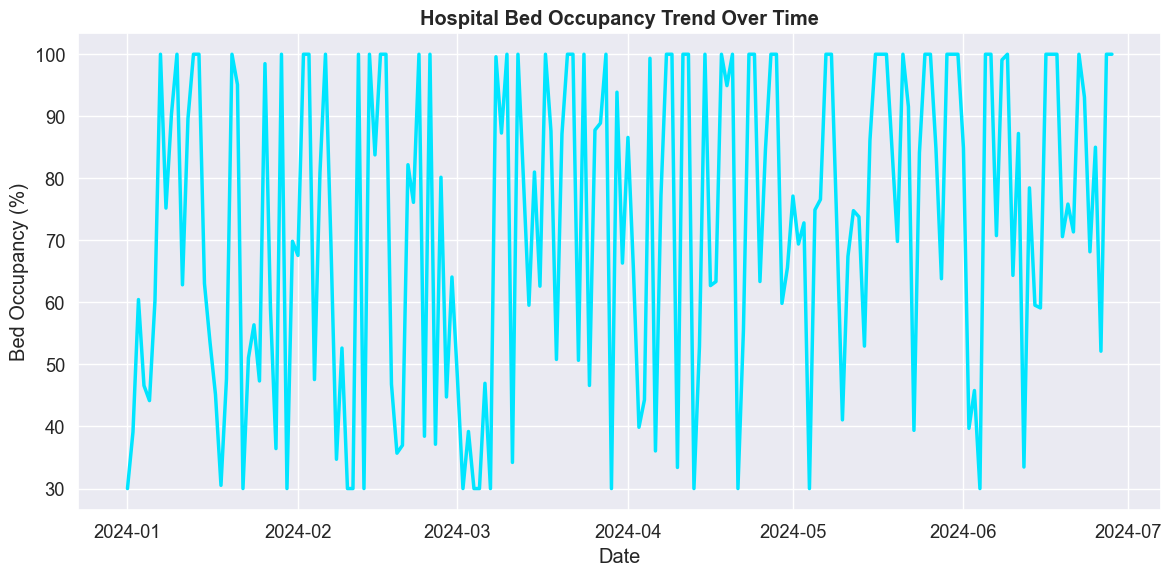

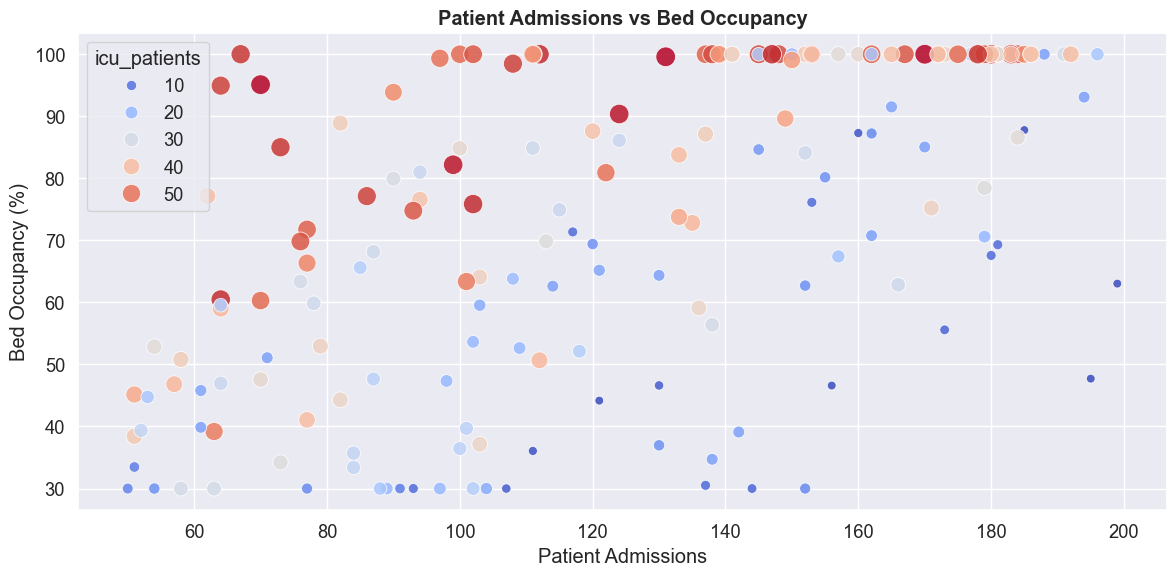

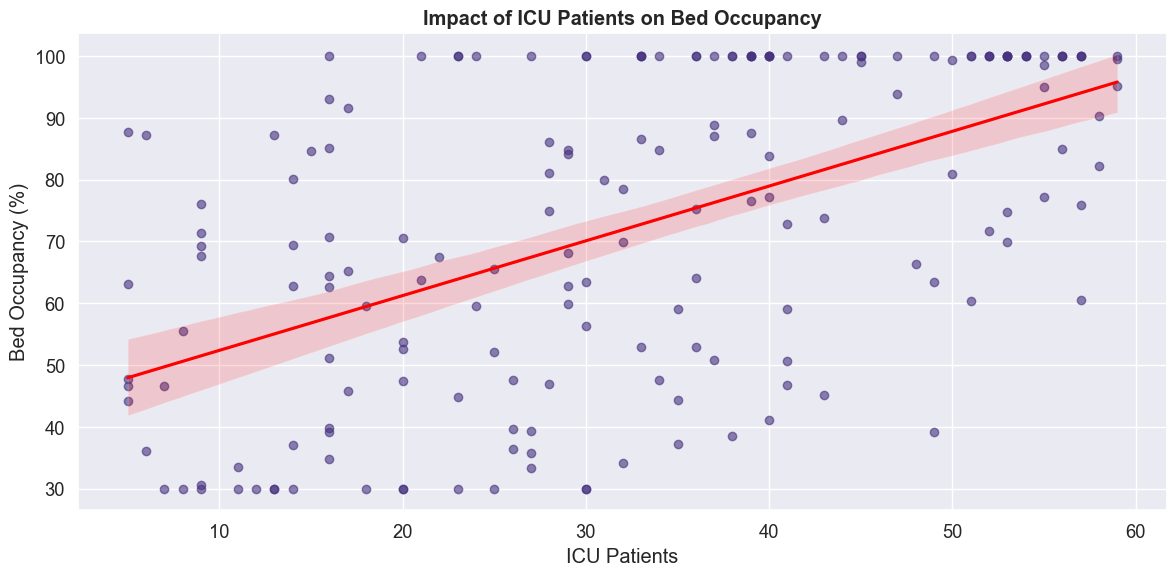

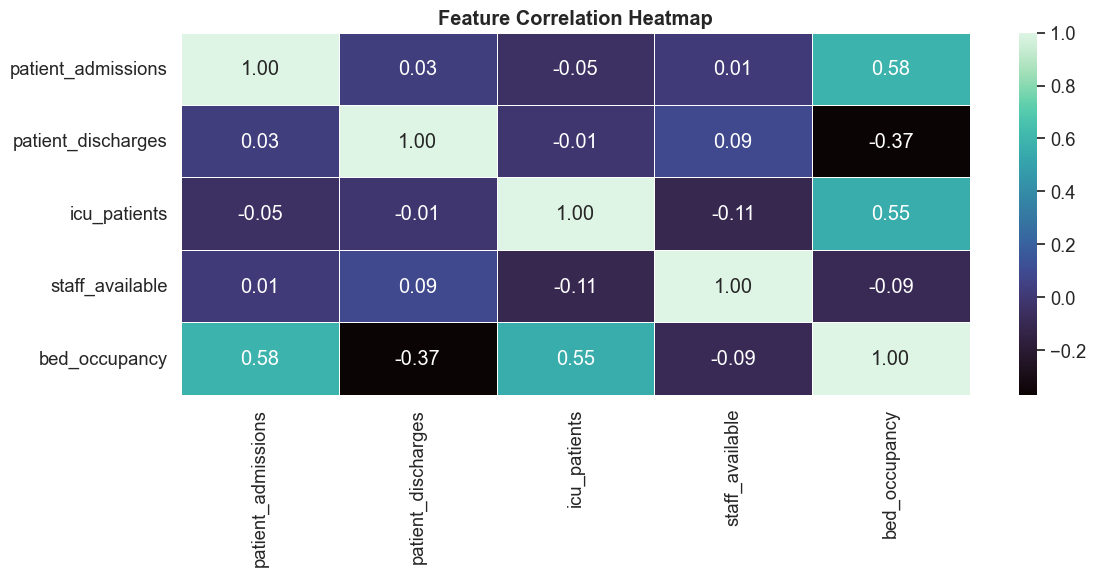

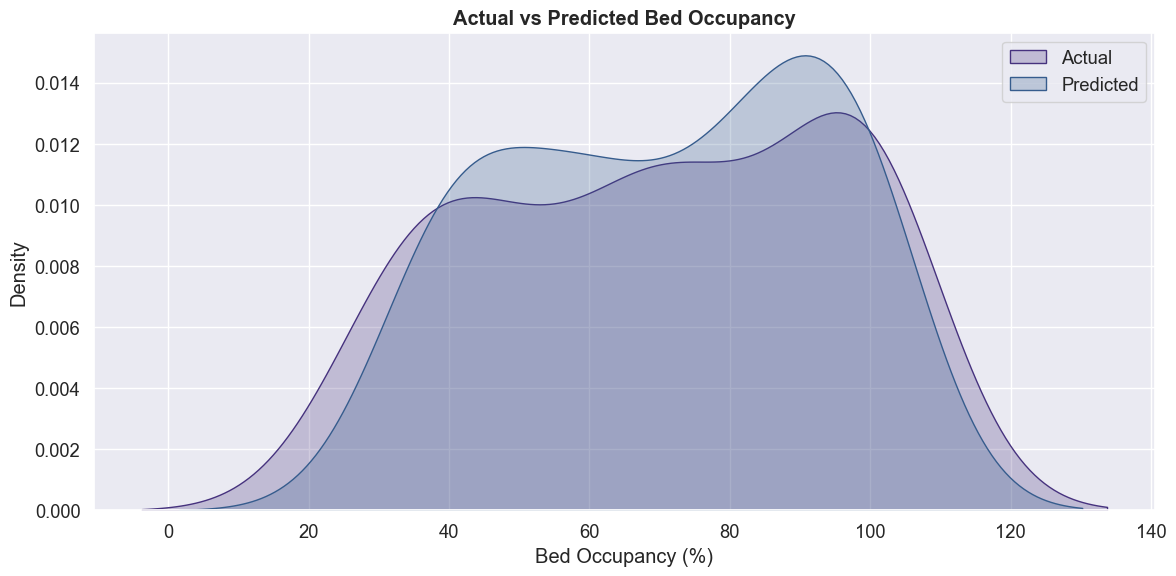

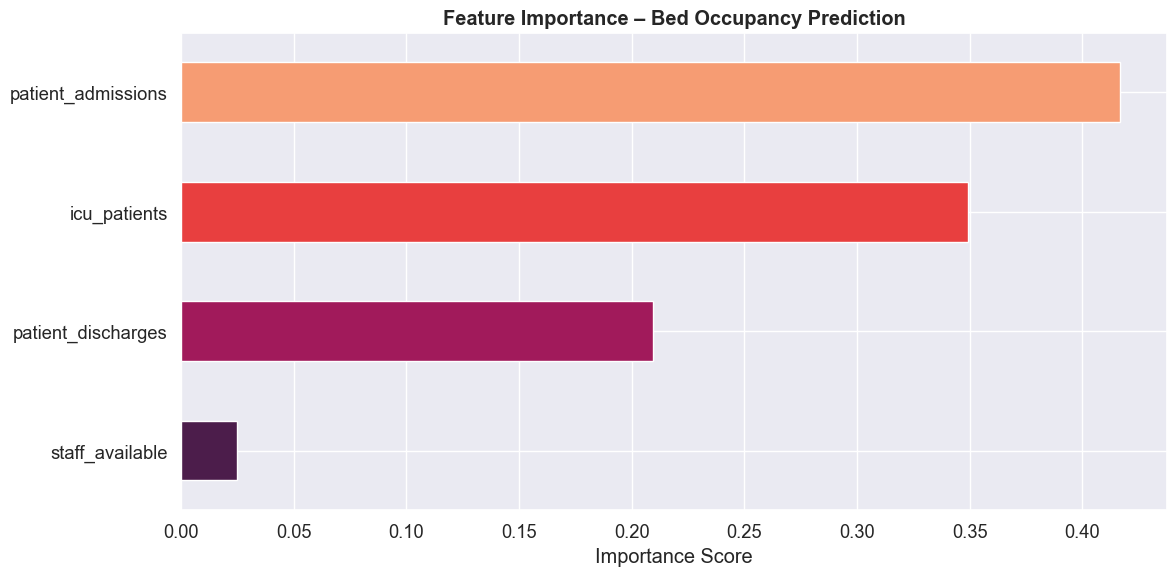

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

df = pd.read_csv("hospital_bed_occupancy.csv")
df["date"] = pd.to_datetime(df["date"])

X = df.drop(columns=["date", "bed_occupancy"])
y = df["bed_occupancy"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

model = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    random_state=42
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Model Performance")
print("-----------------")
print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

print("\n--- Enter Hospital Data for Prediction ---")

admission = int(input("Enter Patient Admissions: "))
discharge = int(input("Enter Patient Discharges: "))
icu = int(input("Enter ICU Patients: "))
staff = int(input("Enter Available Staff: "))

user_input = pd.DataFrame([{
    "patient_admissions": admission,
    "patient_discharges": discharge,
    "icu_patients": icu,
    "staff_available": staff
}])

predicted_occupancy = model.predict(user_input)[0]
print(f"\nPredicted Bed Occupancy: {predicted_occupancy:.2f}%")

sns.set_theme(
    style="darkgrid",
    palette="viridis",
    font_scale=1.2
)

plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams["axes.titleweight"] = "bold"

plt.figure()
sns.lineplot(
    data=df,
    x="date",
    y="bed_occupancy",
    linewidth=2.5,
    color="#00E5FF"
)
plt.title("Hospital Bed Occupancy Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Bed Occupancy (%)")
plt.tight_layout()
plt.show()

plt.figure()
sns.scatterplot(
    data=df,
    x="patient_admissions",
    y="bed_occupancy",
    hue="icu_patients",
    size="icu_patients",
    palette="coolwarm",
    sizes=(40, 200),
    alpha=0.85
)
plt.title("Patient Admissions vs Bed Occupancy")
plt.xlabel("Patient Admissions")
plt.ylabel("Bed Occupancy (%)")
plt.tight_layout()
plt.show()

plt.figure()
sns.regplot(
    data=df,
    x="icu_patients",
    y="bed_occupancy",
    scatter_kws={"alpha": 0.6},
    line_kws={"color": "red"}
)
plt.title("Impact of ICU Patients on Bed Occupancy")
plt.xlabel("ICU Patients")
plt.ylabel("Bed Occupancy (%)")
plt.tight_layout()
plt.show()

plt.figure()
sns.heatmap(
    df.drop(columns=["date"]).corr(),
    annot=True,
    cmap="mako",
    fmt=".2f",
    linewidths=0.6
)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

plt.figure()
sns.kdeplot(y_test, label="Actual", fill=True)
sns.kdeplot(y_pred, label="Predicted", fill=True)
plt.title("Actual vs Predicted Bed Occupancy")
plt.xlabel("Bed Occupancy (%)")
plt.legend()
plt.tight_layout()
plt.show()

importance = pd.Series(
    model.feature_importances_,
    index=X.columns
).sort_values()

plt.figure()
importance.plot(
    kind="barh",
    color=sns.color_palette("rocket", len(importance))
)
plt.title("Feature Importance – Bed Occupancy Prediction")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()
